In [19]:
!pip install simplejson

     |████████████████████████████████| 133kB 5.0MB/s 


#**PROJECT DEPLOYMENT  DONE BY**
#MISS MANDIPA MHLANGA R195848M 
#MISS ABGIRL CHIGUME R195878B
#MISS FRANCINA MUDZINGWA R189405W

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.models import model_from_json
import simplejson
from __future__ import division
%matplotlib inline
import cv2
import os

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [26]:
train = get_training_data('/content/drive/MyDrive/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/chest_xray/val')

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# resize data
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [27]:
train.shape, test.shape, val.shape

((5216, 2), (624, 2), (16, 2))

Text(0.5, 1.0, 'NORMAL')

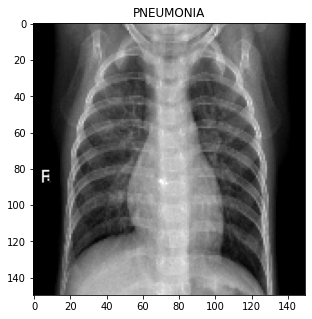

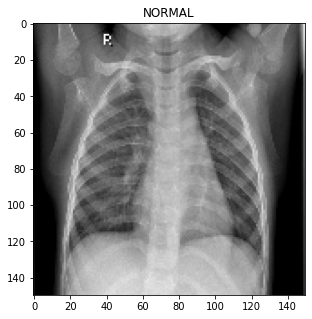

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

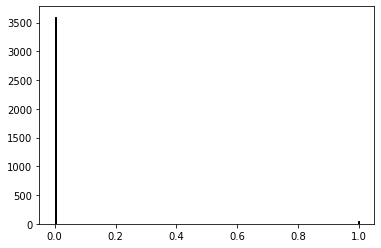

In [ ]:
a=plt.hist((train[0][0]).ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


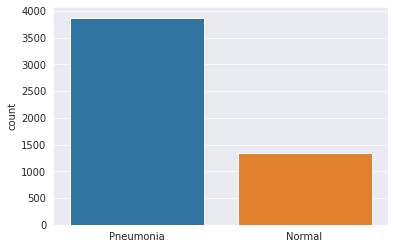

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l) 
plt.show()

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range = 30,  
        zoom_range = 0.2,  
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip = True, 
        vertical_flip=False) 


datagen.fit(x_train)

In [ ]:
def create_model():  
  model = Sequential()
  model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 128 , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units = 1 , activation = 'sigmoid'))
  model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
  # model.summary()
  return model

In [ ]:
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_weights.h5'):
    print('loading Trained Model')
    print('***************************************************************************************')
    with open('/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_model.json', 'r') as json_file:
      model = model_from_json(json_file.read())

    # load weights into new model
    model.load_weights("/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_weights.h5")
    print('Successfully Loaded Time Series Saved Model...')
else:
  create_model()
  learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

  history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

  model_json = model.to_json()
  with open("/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_model.json", "w") as json_file:
    json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

  model.save_weights('/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_weights.h5')

  print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
  print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

  epochs = [i for i in range(12)]
  fig , ax = plt.subplots(1,2)
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  fig.set_size_inches(20,10)

  ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
  ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
  ax[0].set_title('Training & Validation Accuracy')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
  ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
  ax[1].set_title('Testing Accuracy & Loss')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Training & Validation Loss")
  plt.show()

loading Trained Model
***************************************************************************************
Successfully Loaded Time Series Saved Model...


In [ ]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

# history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

# model_json = model.to_json()
# with open("/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_model.json", "w") as json_file:
#   json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

# model.save_weights('/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_weights.h5')

In [ ]:
# X_ray_data = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [rate])

In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[363,  27],
       [ 28, 206]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
cm

,0,1
0,363,27
1,28,206


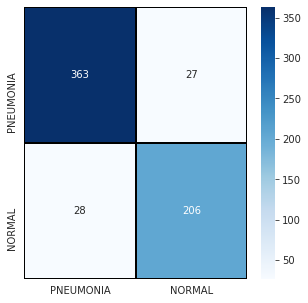

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
plt.show()

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.93      0.93       390
   Normal (Class 1)       0.88      0.88      0.88       234

           accuracy                           0.91       624
          macro avg       0.91      0.91      0.91       624
       weighted avg       0.91      0.91      0.91       624



In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

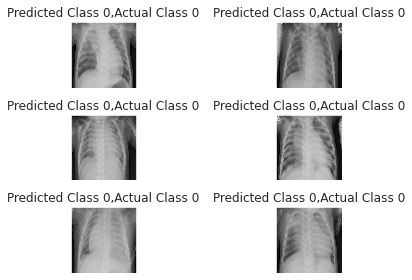

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
def load_image(image_path):
  try:
    img_arr = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
  except Exception as e:
    print(e)
  test_image = np.array(resized_arr) / 255
  test_image = test_image.reshape(-1, img_size, img_size, 1)
  return test_image

In [ ]:
result = model.predict_classes(load_image('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'))[0][0]

if result == 0:
  print("Pneumonia Present")
else:
  print("No Pneumonia Present")

Pneumonia Present


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
!pip install streamlit

In [3]:
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15985 sha256=e2ed8aba4303bfba5cb1e7d9076954e811a660e213f0650422dfd1acd27ae3dc
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [12]:
!ngrok authtoken 1um7xqsKISVZtuRzfeECpXNpcWl_4nGnqom7PzddvnX79FZ2Y

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [13]:
%%writefile app.py
import streamlit as st
import cv2 as cv
import tempfile
import os
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.models import model_from_json
import simplejson

st.title("Pneumonia Detection from Images")

st.subheader("Done By: Abgirl Chigume, Francina Mudzingwa & Mandipa Mhlanga")

labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
  data = []
  for label in labels:
    path = os.path.join(data_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data)

def create_model():  
  model = Sequential()
  model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 128 , activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units = 1 , activation = 'sigmoid'))
  model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
  # model.summary()
  return model

st_res = st.empty()

f = st.file_uploader("Upload Image", type=['png','jpg','jpeg'])

if f is not None:
    tfile = tempfile.NamedTemporaryFile(delete=False, suffix='.jpeg') 
    tfile.write(f.read())

    stframe = st.empty()

    if os.path.exists('/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_weights.h5'):
      print('loading Trained Model')
      print('***************************************************************************************')
      with open('/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_model.json', 'r') as json_file:
        model = model_from_json(json_file.read())

      # load weights into new model
      model.load_weights("/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_weights.h5")
      print('Successfully Loaded Time Series Saved Model...')

      try:
        vf = cv.imread(tfile.name, cv.IMREAD_GRAYSCALE)
        resized_arr = cv.resize(vf, (150, 150)) # Reshaping images to preferred size
      except Exception as e:
        st.error(e)
      test_image = np.array(resized_arr) / 255
      test_image = test_image.reshape(-1, 150, 150, 1)

      result = model.predict_classes(test_image)


      if result == 0:
        st_res.error("Pneumonia Detected")   
      else:
        st_res.success("No Pneumonia Detected")   

      # gray = cv.cvtColor(vf, cv.COLOR_BGR2RGB)
      stframe.image(vf)
    else:
      st.warning("No trained model found...")
      st.info("[**Training new model] - Initialised...")
      

      train = get_training_data('/content/drive/MyDrive/chest_xray/train')
      test = get_training_data('/content/drive/MyDrive/chest_xray/test')
      val = get_training_data('/content/drive/MyDrive/chest_xray/val')

      x_train = []
      y_train = []

      x_val = []
      y_val = []

      x_test = []
      y_test = []

      for feature, label in train:
          x_train.append(feature)
          y_train.append(label)

      for feature, label in test:
          x_test.append(feature)
          y_test.append(label)
          
      for feature, label in val:
          x_val.append(feature)
          y_val.append(label)

      # Normalize the data
      x_train = np.array(x_train) / 255
      x_val = np.array(x_val) / 255
      x_test = np.array(x_test) / 255

      # resize data
      x_train = x_train.reshape(-1, img_size, img_size, 1)
      y_train = np.array(y_train)

      x_val = x_val.reshape(-1, img_size, img_size, 1)
      y_val = np.array(y_val)

      x_test = x_test.reshape(-1, img_size, img_size, 1)
      y_test = np.array(y_test)

      datagen = ImageDataGenerator(
              featurewise_center=False,
              samplewise_center=False,  
              featurewise_std_normalization=False, 
              samplewise_std_normalization=False,  
              zca_whitening=False, 
              rotation_range = 30,  
              zoom_range = 0.2,  
              width_shift_range=0.1, 
              height_shift_range=0.1, 
              horizontal_flip = True, 
              vertical_flip=False) 


      datagen.fit(x_train)

      create_model()
      learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

      history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

      model_json = model.to_json()
      with open("/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_model.json", "w") as json_file:
        json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

      model.save_weights('/content/drive/MyDrive/Colab Notebooks/trained_models/pneumonia_weights.h5')

      st.write("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
      st.write("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")


Overwriting app.py


In [14]:
!streamlit run app.py&>/dev/null&

In [15]:
!pgrep streamlit

179
236


In [16]:
from pyngrok import ngrok

In [10]:
 !kill processid of the app

/bin/bash: line 0: kill: processid: arguments must be process or job IDs
/bin/bash: line 0: kill: of: arguments must be process or job IDs
/bin/bash: line 0: kill: the: arguments must be process or job IDs
/bin/bash: line 0: kill: app: arguments must be process or job IDs


In [17]:
pub_url = ngrok.connect(port='8501')

In [18]:
pub_url

'http://d78362e10b23.ngrok.io'